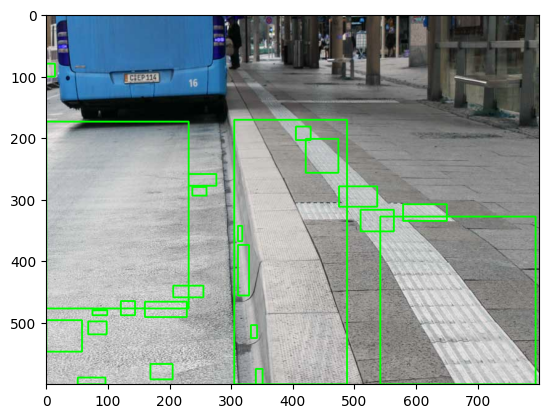

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to the HSV color space
image = cv2.imread("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/project_bums/Test_Bilder/bushalte-21-cm.jpg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper thresholds for the color (in HSV)
lower_color = np.array([0, 0, 190])
upper_color = np.array([180, 100, 255])

# Apply color thresholding to create a binary mask
color_mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Perform morphological operations (optional) to improve the mask
kernel = np.ones((5, 5), np.uint8)
color_mask = cv2.morphologyEx(color_mask, cv2.MORPH_OPEN, kernel)
color_mask = cv2.morphologyEx(color_mask, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary mask
contours, _ = cv2.findContours(color_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and filter out small or noisy contours
min_contour_area = 100  # Adjust this value based on your needs

filtered_contours = []
for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        filtered_contours.append(contour)

# Draw bounding rectangles around the filtered contours on the original image
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the resulting image
plt.imshow(image)

